In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models, metrics
import numpy as np
import matplotlib.pyplot as plt

# SGD Optimiser

Found 4773 files belonging to 2 classes.
Found 632 files belonging to 2 classes.
Found 594 files belonging to 2 classes.
Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 318s 4s/step - accuracy: 0.5664 - loss: 0.6692 - precision: 0.5479 - recall: 0.8405 - val_accuracy: 0.6408 - val_loss: 0.7502 - val_precision: 0.5840 - val_recall: 0.9553
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 315s 4s/step - accuracy: 0.6739 - loss: 0.6275 - precision: 0.6745 - recall: 0.6721 - val_accuracy: 0.8434 - val_loss: 0.4373 - val_precision: 0.8204 - val_recall: 0.8754
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 319s 4s/step - accuracy: 0.8025 - loss: 0.4748 - precision: 0.8128 - recall: 0.7872 - val_accuracy: 0.8655 - val_loss: 0.4040 - val_precision: 0.8476 - val_recall: 0.8882
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 317s 4s/step - accuracy: 0.8281 - loss: 0.4403 - precision: 0.8438 - recall: 0.8052 - val_accuracy: 0.7247 - val_loss: 0.5460 - val_precision: 0.9484 - val_recall: 0.4696
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 313s 

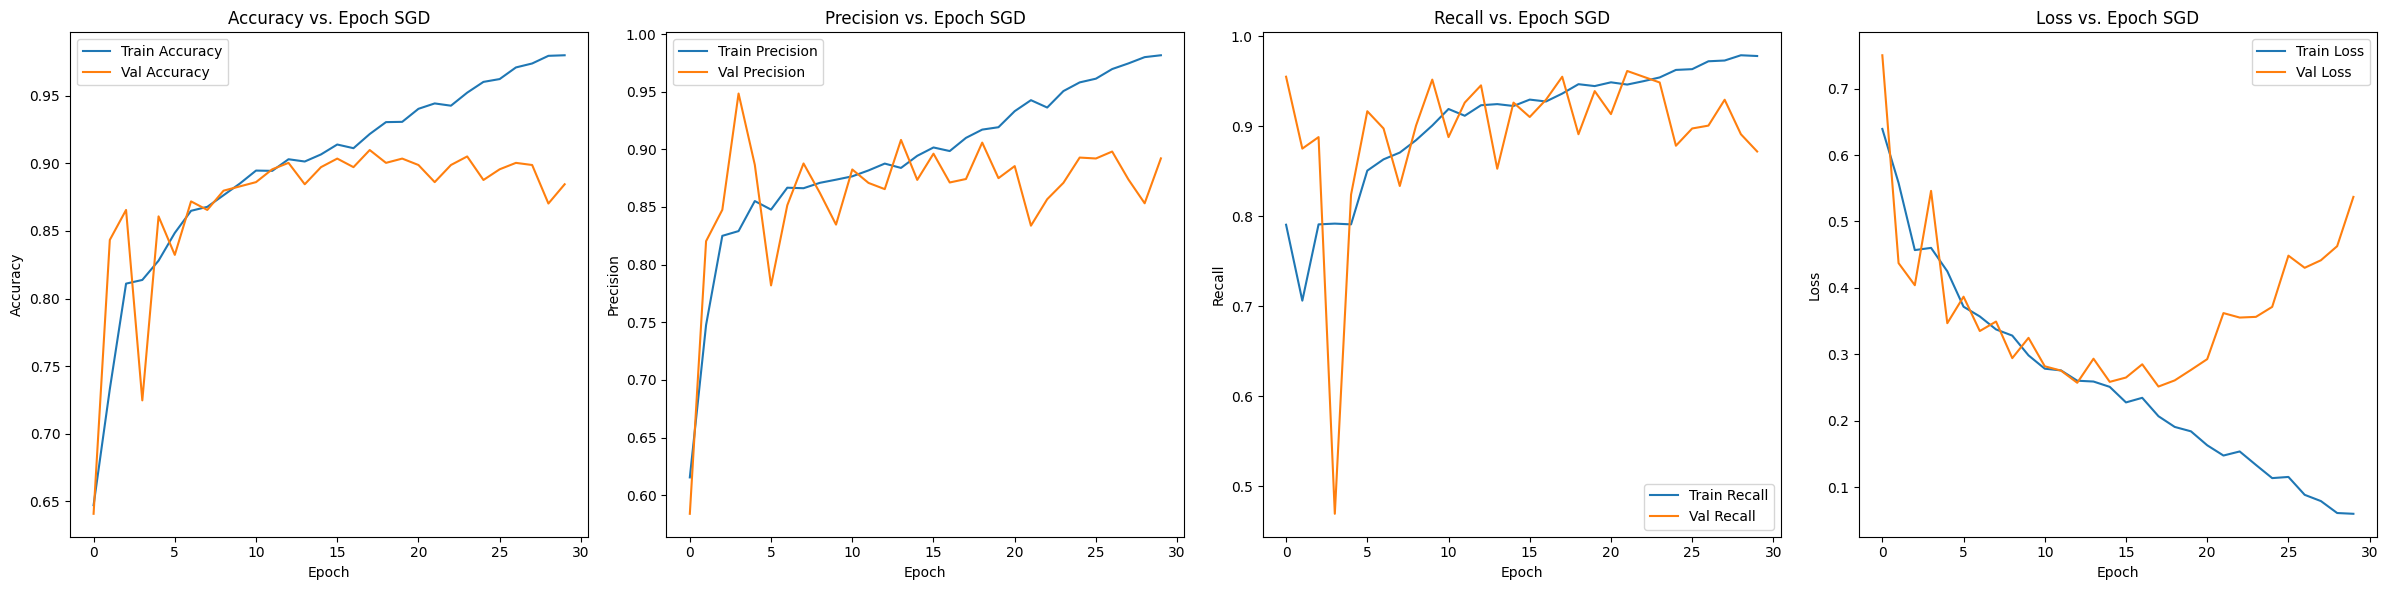

10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8689 - loss: 0.7464 - precision: 0.8581 - recall: 0.8852
Test Accuracy: 0.870
Test Precision: 0.857
Test Recall: 0.883
Test Loss: 0.677


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/Users/gbm746/Documents/Github/processed_dataset/train',
    image_size=(512, 512),
    batch_size=64,
    label_mode='binary'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    '/Users/gbm746/Documents/Github/processed_dataset/val',
    image_size=(512, 512),
    batch_size=64,
    label_mode='binary'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    '/Users/gbm746/Documents/Github/processed_dataset/test',
    image_size=(512, 512),
    batch_size=64,
    label_mode='binary'
)

base_model = models.Sequential([
    layers.Input(shape=(512, 512, 3)),
    layers.Rescaling(1./255),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

base_model.compile(
   optimizer = tf.keras.optimizers.SGD(momentum=0.9),

   loss='binary_crossentropy',
    metrics=[
        'accuracy',
        metrics.Precision(name='precision'),
        metrics.Recall(name='recall')
    ]
)

history = base_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

precision = history.history['precision']
val_precision = history.history['val_precision']

recall = history.history['recall']
val_recall = history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(24, 6))

# Accuracy
plt.subplot(1, 4, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.title('Accuracy vs. Epoch SGD')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Precision
plt.subplot(1, 4, 2)
plt.plot(epochs_range, precision, label='Train Precision')
plt.plot(epochs_range, val_precision, label='Val Precision')
plt.title('Precision vs. Epoch SGD')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

# Recall
plt.subplot(1, 4, 3)
plt.plot(epochs_range, recall, label='Train Recall')
plt.plot(epochs_range, val_recall, label='Val Recall')
plt.title('Recall vs. Epoch SGD')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

# Loss
plt.subplot(1, 4, 4)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.title('Loss vs. Epoch SGD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test dataset
test_loss, test_acc, test_precision, test_recall = base_model.evaluate(test_ds)

# Print out the results
print(f"Test Accuracy: {test_acc:.3f}")
print(f"Test Precision: {test_precision:.3f}")
print(f"Test Recall: {test_recall:.3f}")
print(f"Test Loss: {test_loss:.3f}")

# Epoch Testing

# Epoch Testing

Found 4773 files belonging to 2 classes.
Found 632 files belonging to 2 classes.
Found 594 files belonging to 2 classes.

Training with 5 Epochs
Epoch 1/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 354s 5s/step - accuracy: 0.6507 - loss: 0.8681 - precision: 0.6592 - recall: 0.6823 - val_accuracy: 0.8133 - val_loss: 0.4451 - val_precision: 0.7456 - val_recall: 0.9457
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 399s 5s/step - accuracy: 0.8372 - loss: 0.3996 - precision: 0.8152 - recall: 0.8813 - val_accuracy: 0.8354 - val_loss: 0.3862 - val_precision: 0.7728 - val_recall: 0.9457
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 400s 5s/step - accuracy: 0.8638 - loss: 0.3480 - precision: 0.8476 - recall: 0.8933 - val_accuracy: 0.7690 - val_loss: 0.4306 - val_precision: 0.6868 - val_recall: 0.9808
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 399s 5s/step - accuracy: 0.8650 - loss: 0.3277 - precision: 0.8395 - recall: 0.9116 - val_accuracy: 0.8892 - val_loss: 0.2996 - val_precision: 0.8403 - val_recall: 0.9585
Epoch 5/5
75/75 ━━━━━━━

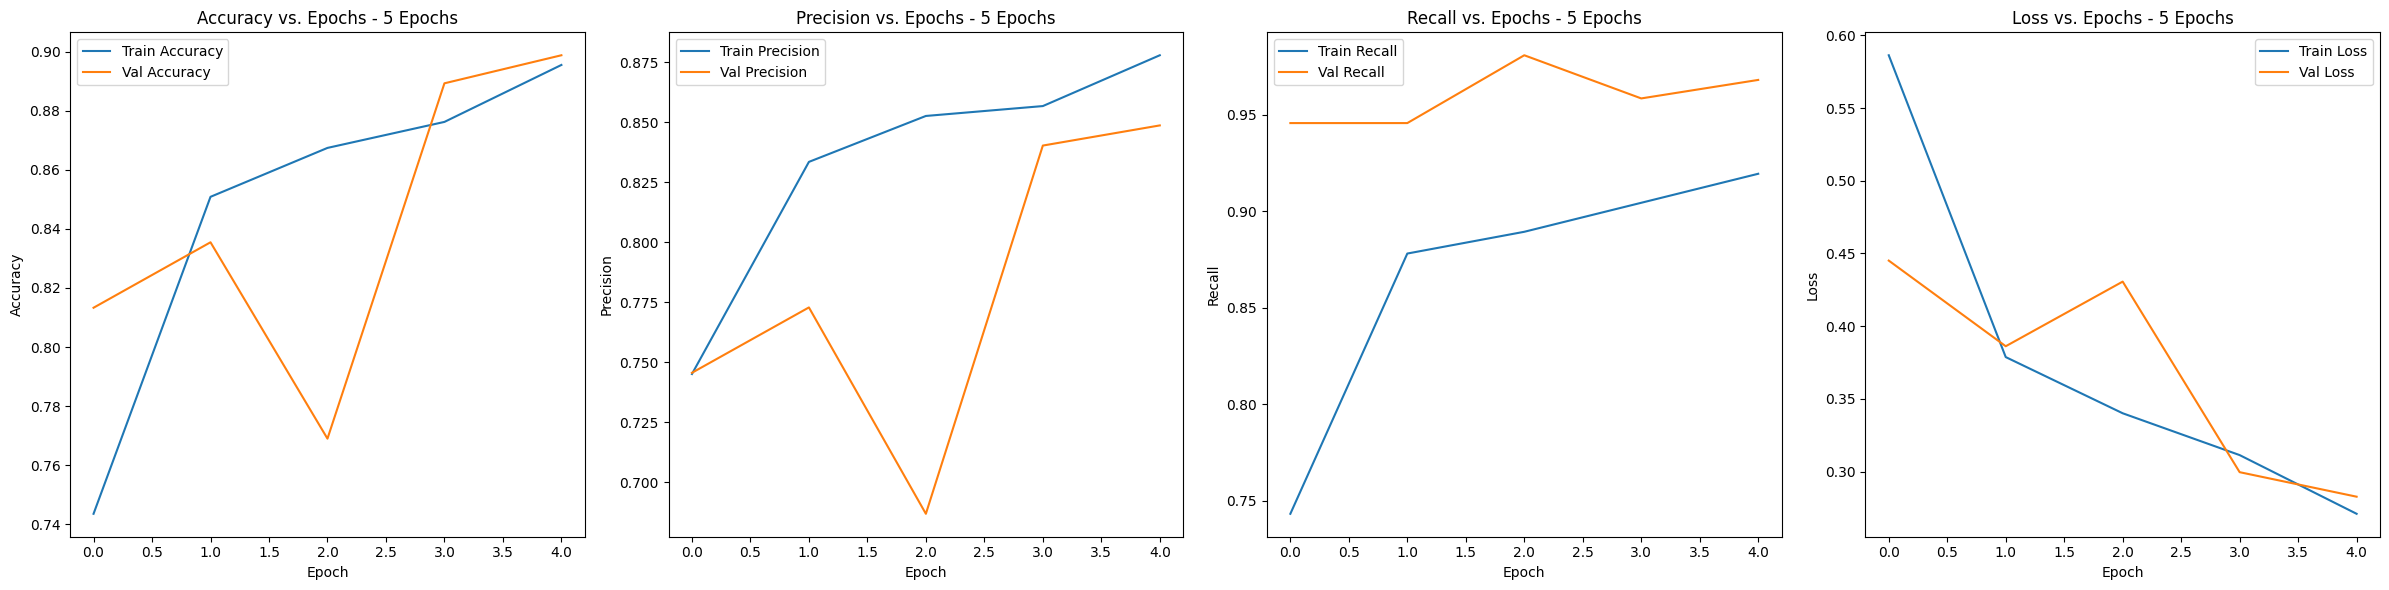


Training with 10 Epochs
Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 394s 5s/step - accuracy: 0.6556 - loss: 0.7891 - precision: 0.6604 - recall: 0.6941 - val_accuracy: 0.6946 - val_loss: 0.5675 - val_precision: 0.6887 - val_recall: 0.6997
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 375s 5s/step - accuracy: 0.8250 - loss: 0.4434 - precision: 0.8170 - recall: 0.8469 - val_accuracy: 0.7263 - val_loss: 0.4717 - val_precision: 0.6446 - val_recall: 0.9968
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 377s 5s/step - accuracy: 0.8480 - loss: 0.3689 - precision: 0.8239 - recall: 0.8948 - val_accuracy: 0.8671 - val_loss: 0.3457 - val_precision: 0.8804 - val_recall: 0.8466
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 372s 5s/step - accuracy: 0.8651 - loss: 0.3355 - precision: 0.8451 - recall: 0.9027 - val_accuracy: 0.8655 - val_loss: 0.3317 - val_precision: 0.8115 - val_recall: 0.9489
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 371s 5s/step - accuracy: 0.8887 - loss: 0.2886 - precision: 0.8656 - recall: 0.9255 - val_accuracy: 0

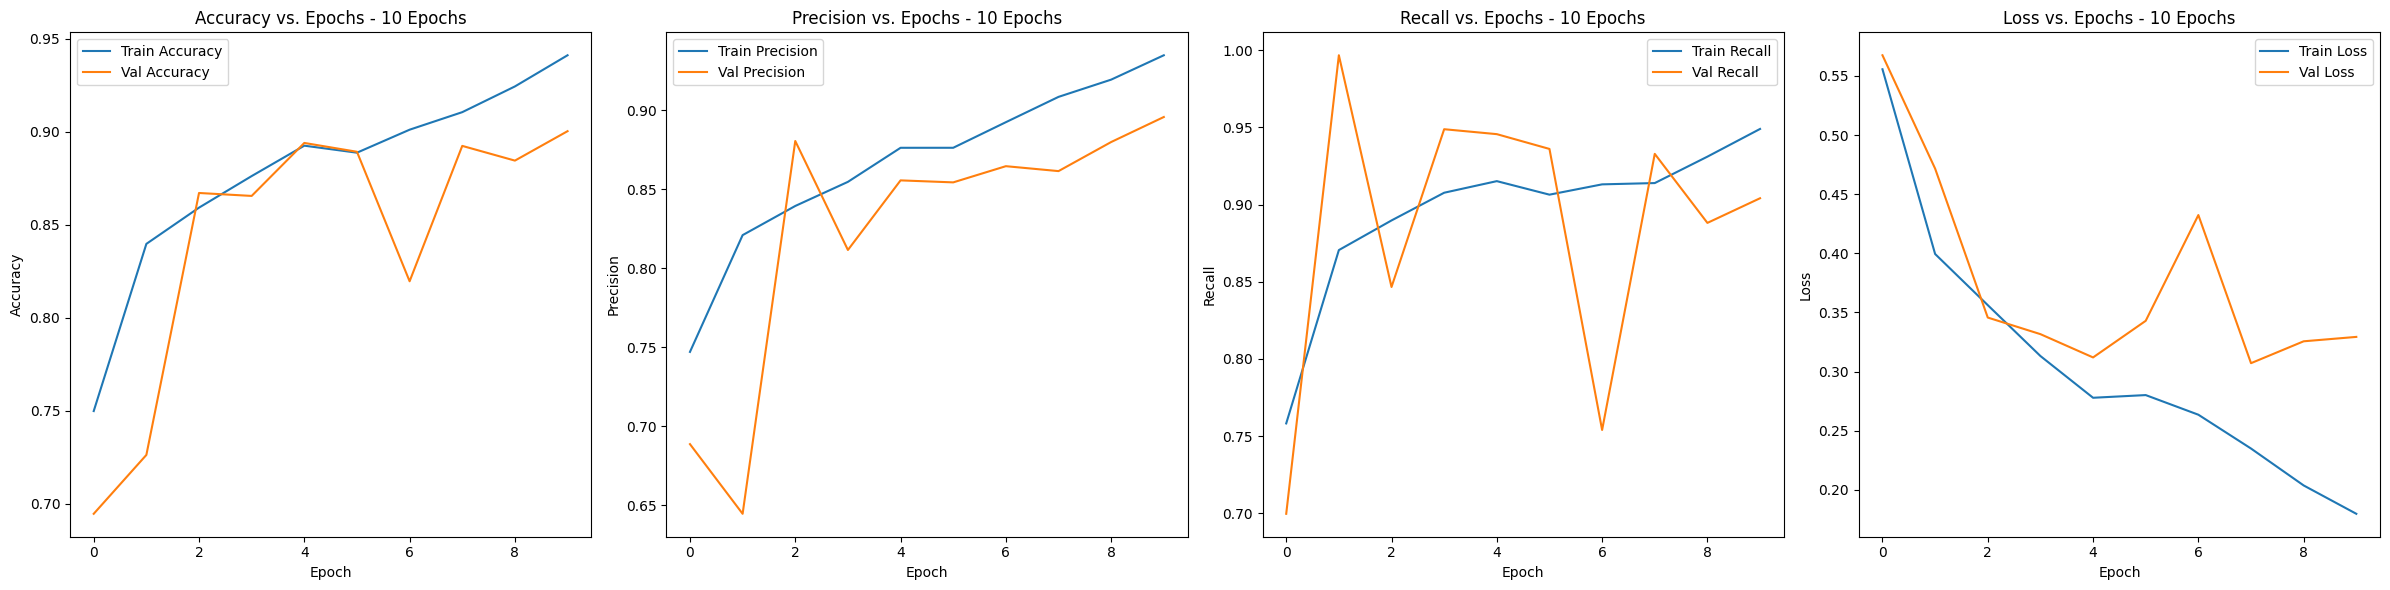


Training with 15 Epochs
Epoch 1/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 391s 5s/step - accuracy: 0.6961 - loss: 0.5820 - precision: 0.7210 - recall: 0.6372 - val_accuracy: 0.8481 - val_loss: 0.4149 - val_precision: 0.7956 - val_recall: 0.9329
Epoch 2/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 382s 5s/step - accuracy: 0.8325 - loss: 0.4085 - precision: 0.8107 - recall: 0.8758 - val_accuracy: 0.8703 - val_loss: 0.3385 - val_precision: 0.8164 - val_recall: 0.9521
Epoch 3/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 355s 5s/step - accuracy: 0.8610 - loss: 0.3488 - precision: 0.8295 - recall: 0.9156 - val_accuracy: 0.8465 - val_loss: 0.3800 - val_precision: 0.8034 - val_recall: 0.9137
Epoch 4/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 352s 5s/step - accuracy: 0.8538 - loss: 0.3598 - precision: 0.8339 - recall: 0.8920 - val_accuracy: 0.8956 - val_loss: 0.2756 - val_precision: 0.8665 - val_recall: 0.9329
Epoch 5/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 354s 5s/step - accuracy: 0.8825 - loss: 0.2982 - precision: 0.8593 - recall: 0.9201 - val_accuracy: 0

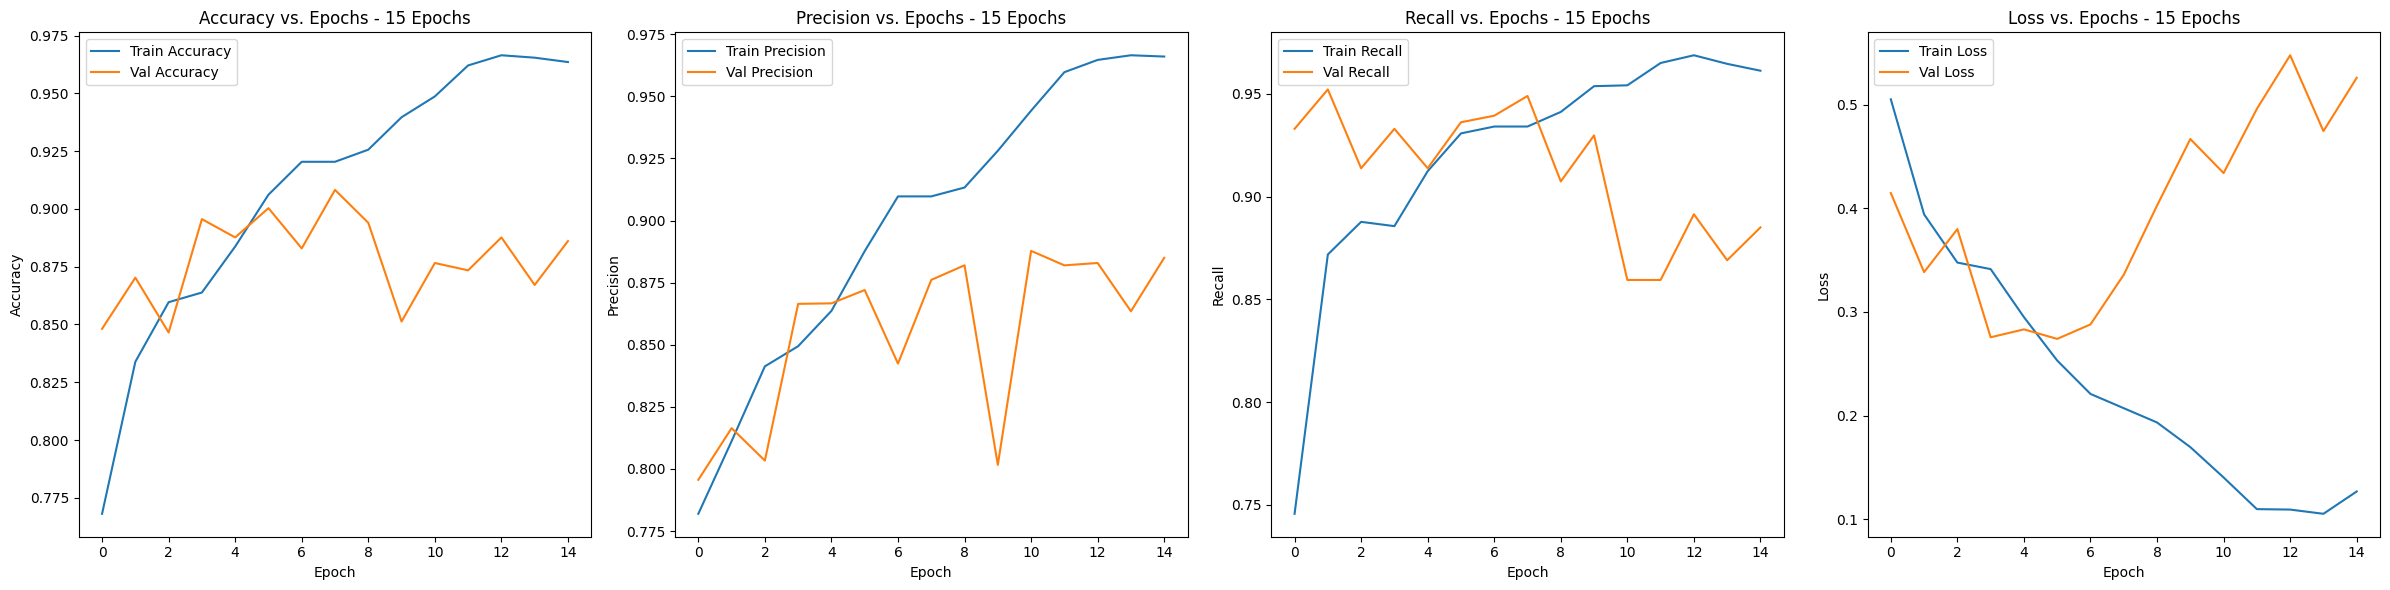


Training with 20 Epochs
Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 387s 5s/step - accuracy: 0.6825 - loss: 0.7676 - precision: 0.7091 - recall: 0.6463 - val_accuracy: 0.8117 - val_loss: 0.4218 - val_precision: 0.8702 - val_recall: 0.7284
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 381s 5s/step - accuracy: 0.8208 - loss: 0.4152 - precision: 0.8024 - recall: 0.8635 - val_accuracy: 0.8687 - val_loss: 0.3440 - val_precision: 0.8142 - val_recall: 0.9521
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 356s 5s/step - accuracy: 0.8524 - loss: 0.3600 - precision: 0.8319 - recall: 0.8902 - val_accuracy: 0.8782 - val_loss: 0.3031 - val_precision: 0.8333 - val_recall: 0.9425
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 358s 5s/step - accuracy: 0.8665 - loss: 0.3386 - precision: 0.8516 - recall: 0.8937 - val_accuracy: 0.8845 - val_loss: 0.3073 - val_precision: 0.8509 - val_recall: 0.9297
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 365s 5s/step - accuracy: 0.8810 - loss: 0.3187 - precision: 0.8586 - recall: 0.9177 - val_accuracy: 0

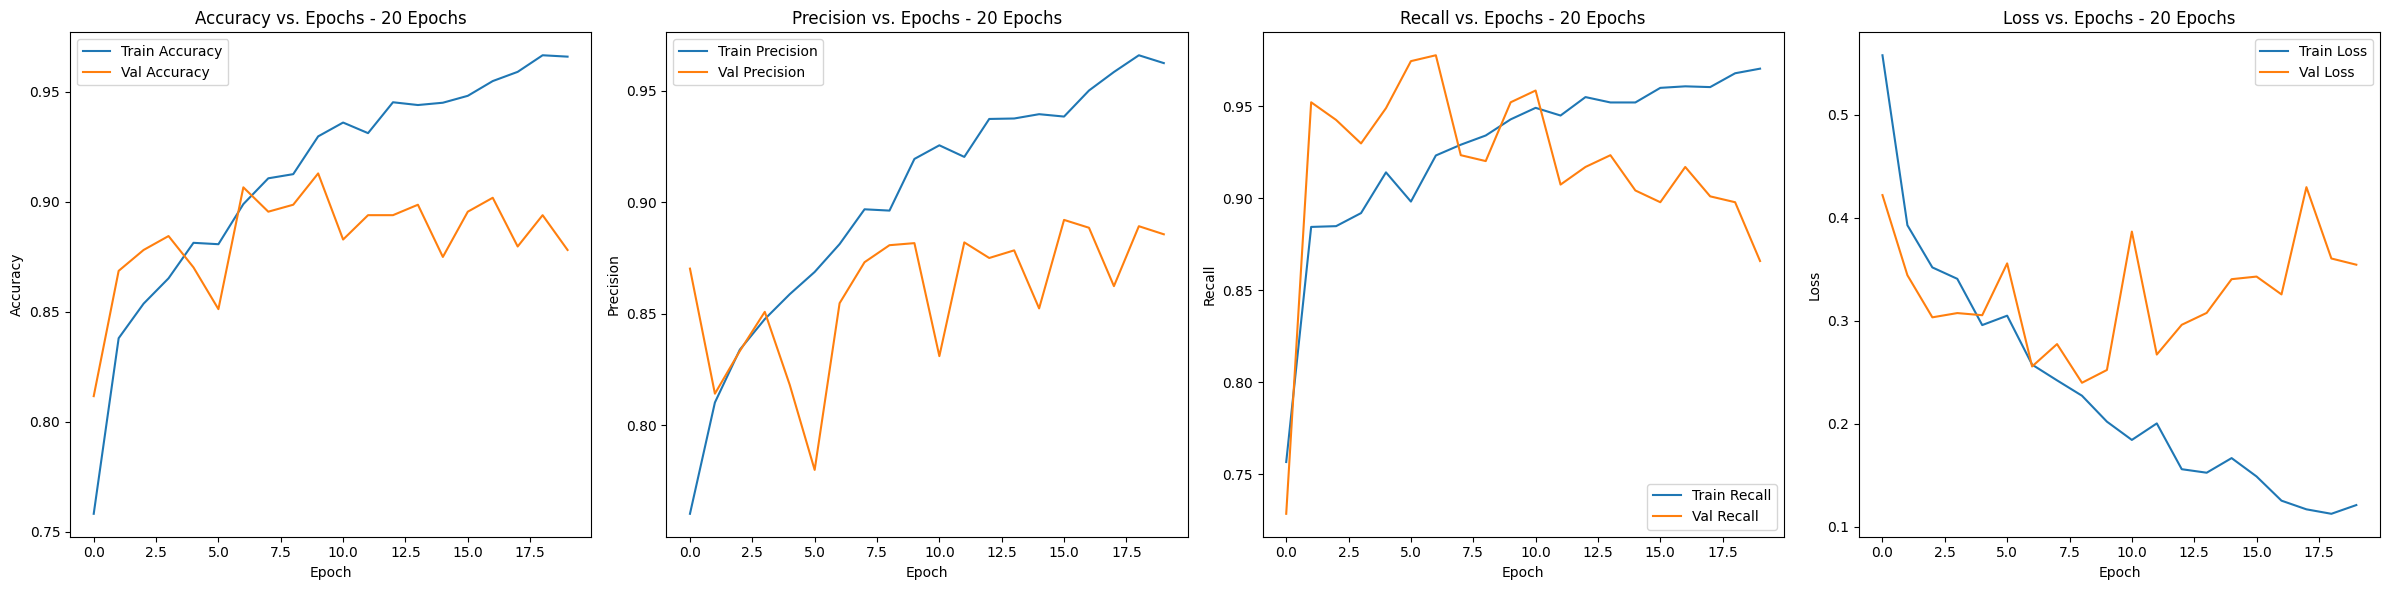


Training with 40 Epochs
Epoch 1/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 390s 5s/step - accuracy: 0.6041 - loss: 1.0380 - precision: 0.6040 - recall: 0.6943 - val_accuracy: 0.7832 - val_loss: 0.4802 - val_precision: 0.9272 - val_recall: 0.6102
Epoch 2/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 380s 5s/step - accuracy: 0.8170 - loss: 0.4313 - precision: 0.8395 - recall: 0.7951 - val_accuracy: 0.8671 - val_loss: 0.3363 - val_precision: 0.8754 - val_recall: 0.8530
Epoch 3/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 379s 5s/step - accuracy: 0.8460 - loss: 0.3751 - precision: 0.8558 - recall: 0.8411 - val_accuracy: 0.8212 - val_loss: 0.3770 - val_precision: 0.7538 - val_recall: 0.9489
Epoch 4/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 380s 5s/step - accuracy: 0.8676 - loss: 0.3326 - precision: 0.8574 - recall: 0.8891 - val_accuracy: 0.8797 - val_loss: 0.3080 - val_precision: 0.8455 - val_recall: 0.9265
Epoch 5/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 388s 5s/step - accuracy: 0.8818 - loss: 0.3046 - precision: 0.8718 - recall: 0.9003 - val_accuracy: 0

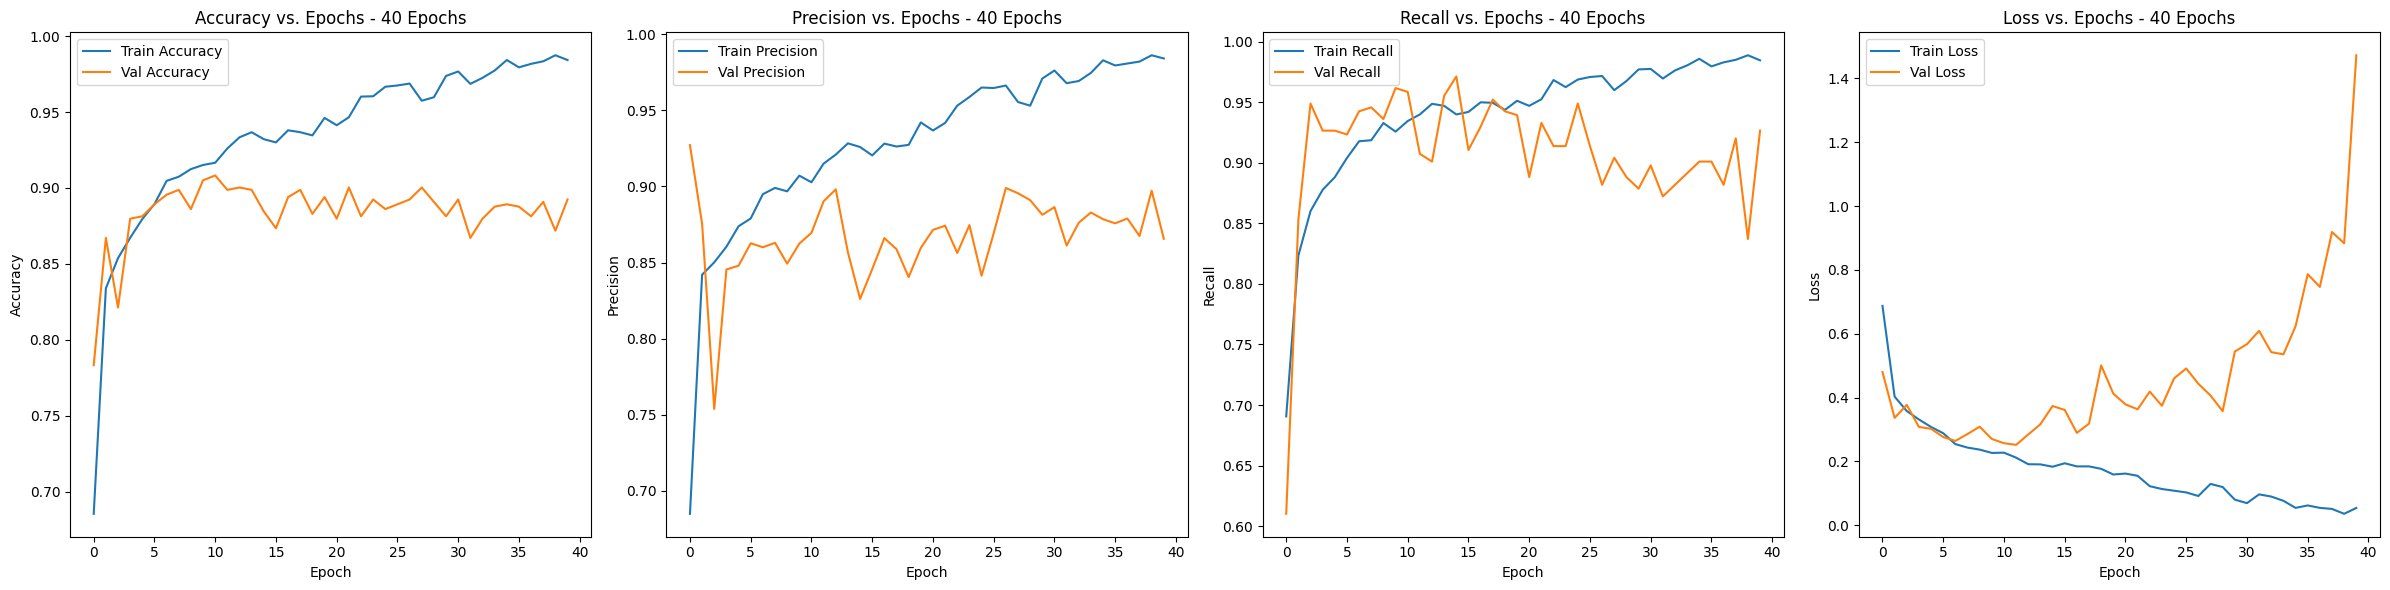


Training with 60 Epochs
Epoch 1/60
75/75 ━━━━━━━━━━━━━━━━━━━━ 396s 5s/step - accuracy: 0.6865 - loss: 0.6116 - precision: 0.6967 - recall: 0.6573 - val_accuracy: 0.8291 - val_loss: 0.3941 - val_precision: 0.8622 - val_recall: 0.7796
Epoch 2/60
75/75 ━━━━━━━━━━━━━━━━━━━━ 383s 5s/step - accuracy: 0.8462 - loss: 0.3980 - precision: 0.8376 - recall: 0.8685 - val_accuracy: 0.8861 - val_loss: 0.2774 - val_precision: 0.8493 - val_recall: 0.9361
Epoch 3/60
75/75 ━━━━━━━━━━━━━━━━━━━━ 396s 5s/step - accuracy: 0.8681 - loss: 0.3265 - precision: 0.8502 - recall: 0.8998 - val_accuracy: 0.8497 - val_loss: 0.3233 - val_precision: 0.7946 - val_recall: 0.9393
Epoch 4/60
75/75 ━━━━━━━━━━━━━━━━━━━━ 390s 5s/step - accuracy: 0.8783 - loss: 0.3091 - precision: 0.8591 - recall: 0.9112 - val_accuracy: 0.8845 - val_loss: 0.2941 - val_precision: 0.8529 - val_recall: 0.9265
Epoch 5/60
75/75 ━━━━━━━━━━━━━━━━━━━━ 346s 5s/step - accuracy: 0.8744 - loss: 0.3205 - precision: 0.8560 - recall: 0.9065 - val_accuracy: 0

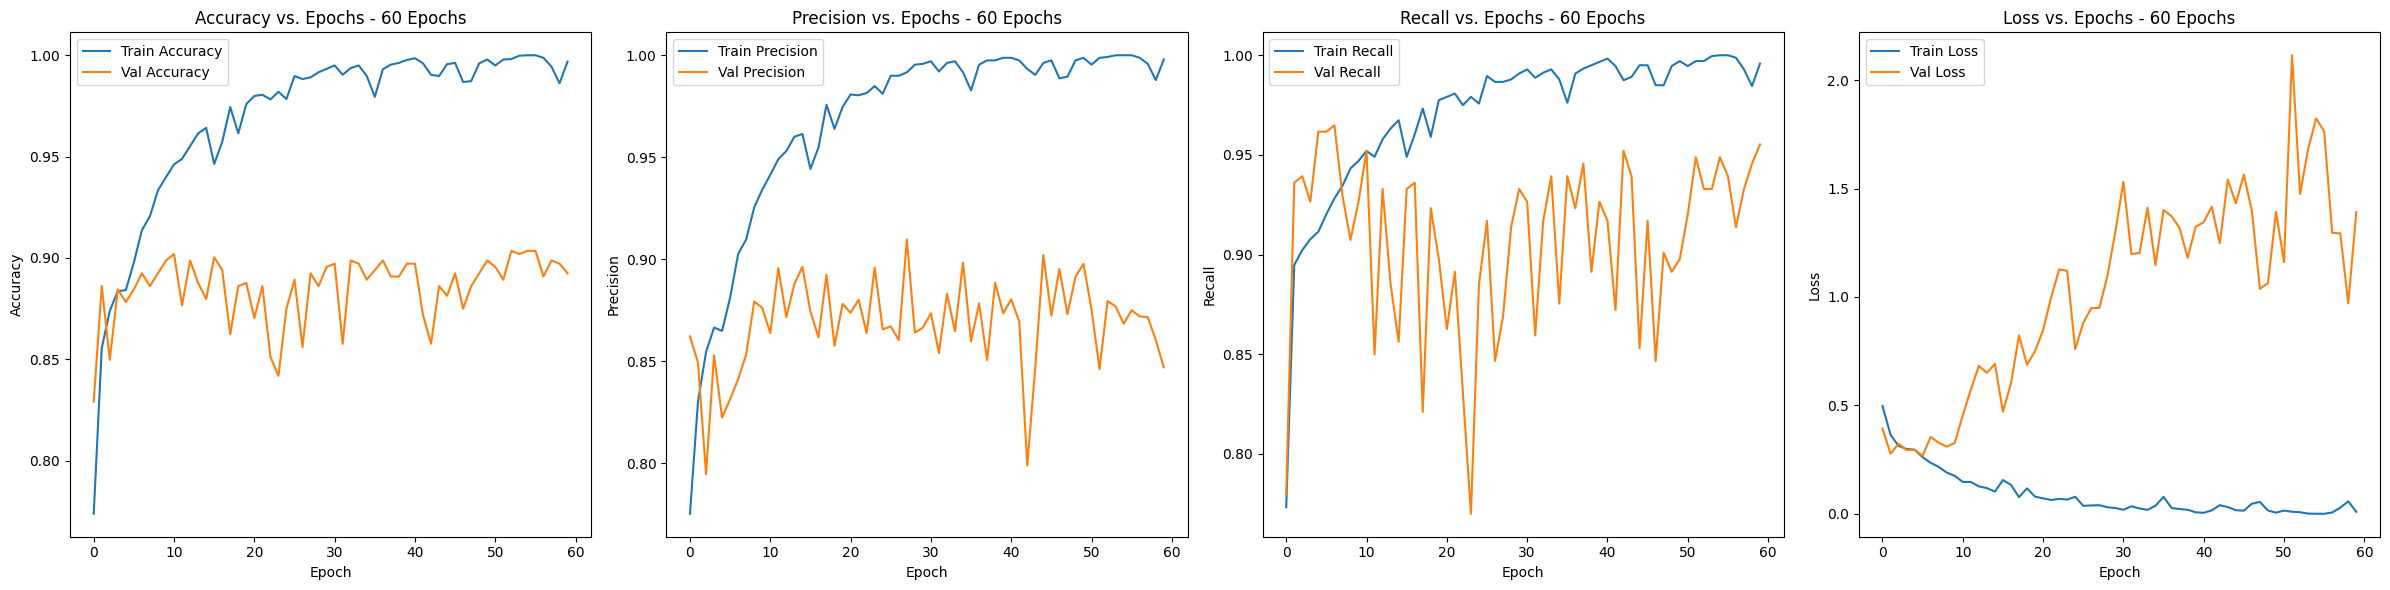

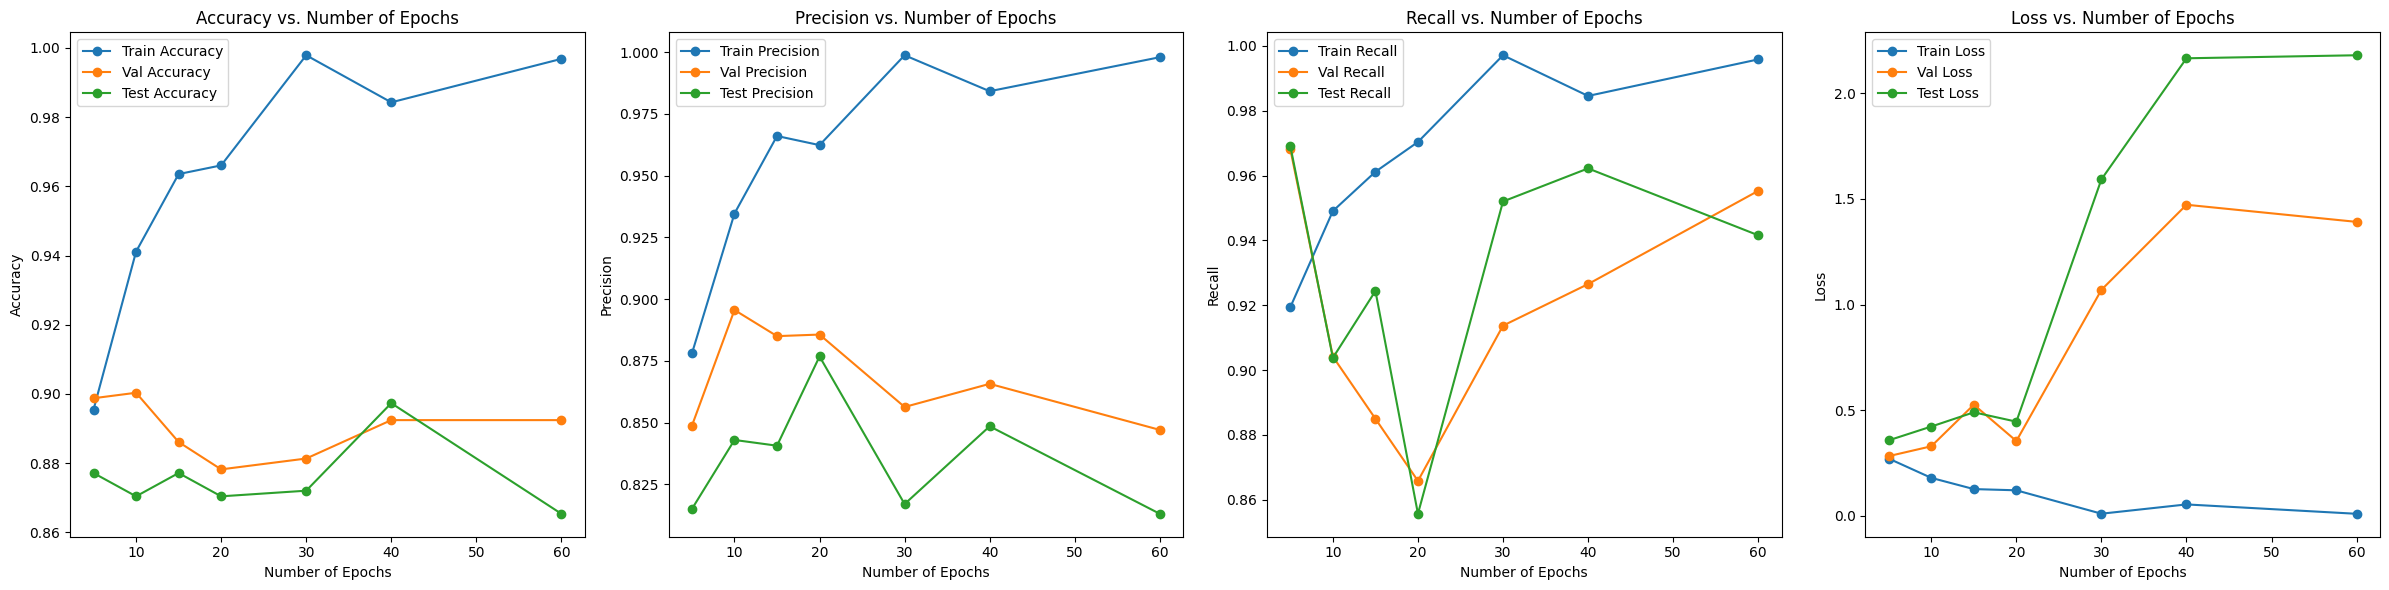

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models, metrics
import numpy as np
import matplotlib.pyplot as plt

# Define epoch variations
epoch_counts = [5, 10, 15, 20, 40, 60]
batch_size = 64  # fixed batch size
dense_layers = 2  # Fixed number of dense layers

# Initialize lists to store metrics
train_accuracies, val_accuracies, test_accuracies = [], [], []
train_precisions, val_precisions, test_precisions = [], [], []
train_recalls, val_recalls, test_recalls = [], [], []
train_losses, val_losses, test_losses = [], [], []

AUTOTUNE = tf.data.AUTOTUNE

# Load datasets once since batch size is constant
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/Users/gbm746/Documents/Github/processed_dataset/train',
    image_size=(512, 512),
    batch_size=batch_size,
    label_mode='binary'
).cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.keras.utils.image_dataset_from_directory(
    '/Users/gbm746/Documents/Github/processed_dataset/val',
    image_size=(512, 512),
    batch_size=batch_size,
    label_mode='binary'
).cache().prefetch(buffer_size=AUTOTUNE)

test_ds = tf.keras.utils.image_dataset_from_directory(
    '/Users/gbm746/Documents/Github/processed_dataset/test',
    image_size=(512, 512),
    batch_size=batch_size,
    label_mode='binary'
).cache().prefetch(buffer_size=AUTOTUNE)

for num_epochs in epoch_counts:
    print(f"\nTraining with {num_epochs} Epochs")

    # Build model
    model = models.Sequential([
        layers.Input(shape=(512, 512, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten()
    ])

    # Add fixed number of Dense layers
    for _ in range(dense_layers):
        model.add(layers.Dense(128, activation='relu'))

    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall')
        ]
    )

    # Train model
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=num_epochs,
    )

    # Evaluate model
    test_loss, test_acc, test_precision, test_recall = model.evaluate(test_ds)

    print(f"Epochs {num_epochs}:")
    print(f"Test Accuracy: {test_acc:.3f}")
    print(f"Test Precision: {test_precision:.3f}")
    print(f"Test Recall: {test_recall:.3f}")
    print(f"Test Loss: {test_loss:.3f}")

    # History metrics
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    precision = history.history['precision']
    val_precision = history.history['val_precision']
    recall = history.history['recall']
    val_recall = history.history['val_recall']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Store final epoch values
    train_accuracies.append(acc[-1])
    val_accuracies.append(val_acc[-1])
    test_accuracies.append(test_acc)

    train_precisions.append(precision[-1])
    val_precisions.append(val_precision[-1])
    test_precisions.append(test_precision)

    train_recalls.append(recall[-1])
    val_recalls.append(val_recall[-1])
    test_recalls.append(test_recall)

    train_losses.append(loss[-1])
    val_losses.append(val_loss[-1])
    test_losses.append(test_loss)

    # Plot metrics per epoch
    epochs_range = range(len(acc))
    plt.figure(figsize=(24, 6))

    plt.subplot(1, 4, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Val Accuracy')
    plt.title(f'Accuracy vs. Epochs - {num_epochs} Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 4, 2)
    plt.plot(epochs_range, precision, label='Train Precision')
    plt.plot(epochs_range, val_precision, label='Val Precision')
    plt.title(f'Precision vs. Epochs - {num_epochs} Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.legend()

    plt.subplot(1, 4, 3)
    plt.plot(epochs_range, recall, label='Train Recall')
    plt.plot(epochs_range, val_recall, label='Val Recall')
    plt.title(f'Recall vs. Epochs - {num_epochs} Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()

    plt.subplot(1, 4, 4)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.title(f'Loss vs. Epochs - {num_epochs} Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Add 30-epoch data manually
epoch_30_index = np.searchsorted(epoch_counts, 30)
epoch_counts.insert(epoch_30_index, 30)

# Metrics from your data
train_accuracies.insert(epoch_30_index, 0.9979)
val_accuracies.insert(epoch_30_index, 0.8813)
test_accuracies.insert(epoch_30_index, 0.872)

train_precisions.insert(epoch_30_index, 0.9987)
val_precisions.insert(epoch_30_index, 0.8563)
test_precisions.insert(epoch_30_index, 0.817)

train_recalls.insert(epoch_30_index, 0.9971)
val_recalls.insert(epoch_30_index, 0.9137)
test_recalls.insert(epoch_30_index, 0.952)

train_losses.insert(epoch_30_index, 0.0101)
val_losses.insert(epoch_30_index, 1.0699)
test_losses.insert(epoch_30_index, 1.593)

# Plot final metrics vs number of epochs
plt.figure(figsize=(24, 6))

plt.subplot(1, 4, 1)
plt.plot(epoch_counts, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epoch_counts, val_accuracies, label='Val Accuracy', marker='o')
plt.plot(epoch_counts, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Accuracy vs. Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 4, 2)
plt.plot(epoch_counts, train_precisions, label='Train Precision', marker='o')
plt.plot(epoch_counts, val_precisions, label='Val Precision', marker='o')
plt.plot(epoch_counts, test_precisions, label='Test Precision', marker='o')
plt.title('Precision vs. Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Precision')
plt.legend()

plt.subplot(1, 4, 3)
plt.plot(epoch_counts, train_recalls, label='Train Recall', marker='o')
plt.plot(epoch_counts, val_recalls, label='Val Recall', marker='o')
plt.plot(epoch_counts, test_recalls, label='Test Recall', marker='o')
plt.title('Recall vs. Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Recall')
plt.legend()

plt.subplot(1, 4, 4)
plt.plot(epoch_counts, train_losses, label='Train Loss', marker='o')
plt.plot(epoch_counts, val_losses, label='Val Loss', marker='o')
plt.plot(epoch_counts, test_losses, label='Test Loss', marker='o')
plt.title('Loss vs. Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Convolutional Layers Testing

# Conv Layer Testing

Found 4773 files belonging to 2 classes.
Found 632 files belonging to 2 classes.
Found 594 files belonging to 2 classes.

Training with 2 Convolutional Layers
Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 241s 3s/step - accuracy: 0.6247 - loss: 11.5449 - precision: 0.6086 - recall: 0.7289 - val_accuracy: 0.8022 - val_loss: 0.4548 - val_precision: 0.8092 - val_recall: 0.7859
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 294s 4s/step - accuracy: 0.7981 - loss: 0.4829 - precision: 0.8125 - recall: 0.7777 - val_accuracy: 0.8418 - val_loss: 0.3936 - val_precision: 0.9112 - val_recall: 0.7540
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 293s 4s/step - accuracy: 0.8526 - loss: 0.3789 - precision: 0.8676 - recall: 0.8334 - val_accuracy: 0.8576 - val_loss: 0.3514 - val_precision: 0.8940 - val_recall: 0.8083
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 291s 4s/step - accuracy: 0.8714 - loss: 0.3461 - precision: 0.8849 - recall: 0.8549 - val_accuracy: 0.8766 - val_loss: 0.3114 - val_precision: 0.8487 - val_recall: 0.9137
Epoc

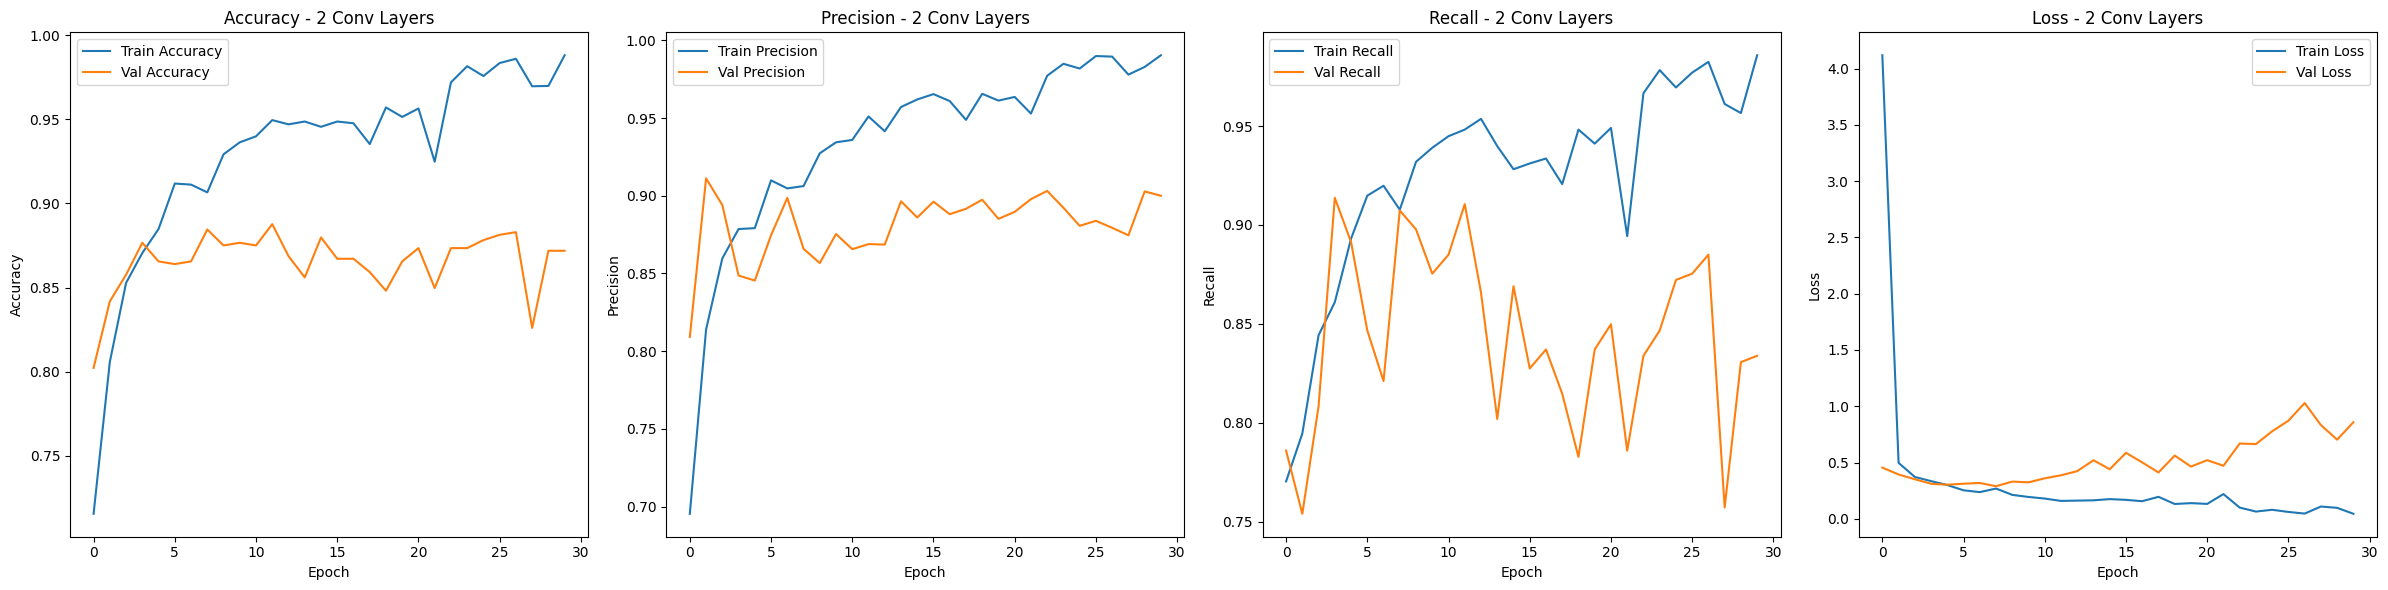


Training with 3 Convolutional Layers
Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 352s 5s/step - accuracy: 0.6804 - loss: 1.4103 - precision: 0.6872 - recall: 0.6238 - val_accuracy: 0.8449 - val_loss: 0.3591 - val_precision: 0.8826 - val_recall: 0.7923
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 334s 4s/step - accuracy: 0.8350 - loss: 0.4107 - precision: 0.8502 - recall: 0.8148 - val_accuracy: 0.8513 - val_loss: 0.3648 - val_precision: 0.9363 - val_recall: 0.7508
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 346s 5s/step - accuracy: 0.8628 - loss: 0.3473 - precision: 0.8558 - recall: 0.8750 - val_accuracy: 0.8655 - val_loss: 0.2937 - val_precision: 0.8904 - val_recall: 0.8307
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 349s 5s/step - accuracy: 0.8858 - loss: 0.3158 - precision: 0.8920 - recall: 0.8793 - val_accuracy: 0.8892 - val_loss: 0.3106 - val_precision: 0.8907 - val_recall: 0.8850
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 350s 5s/step - accuracy: 0.8914 - loss: 0.2765 - precision: 0.9064 - recall: 0.8739 - va

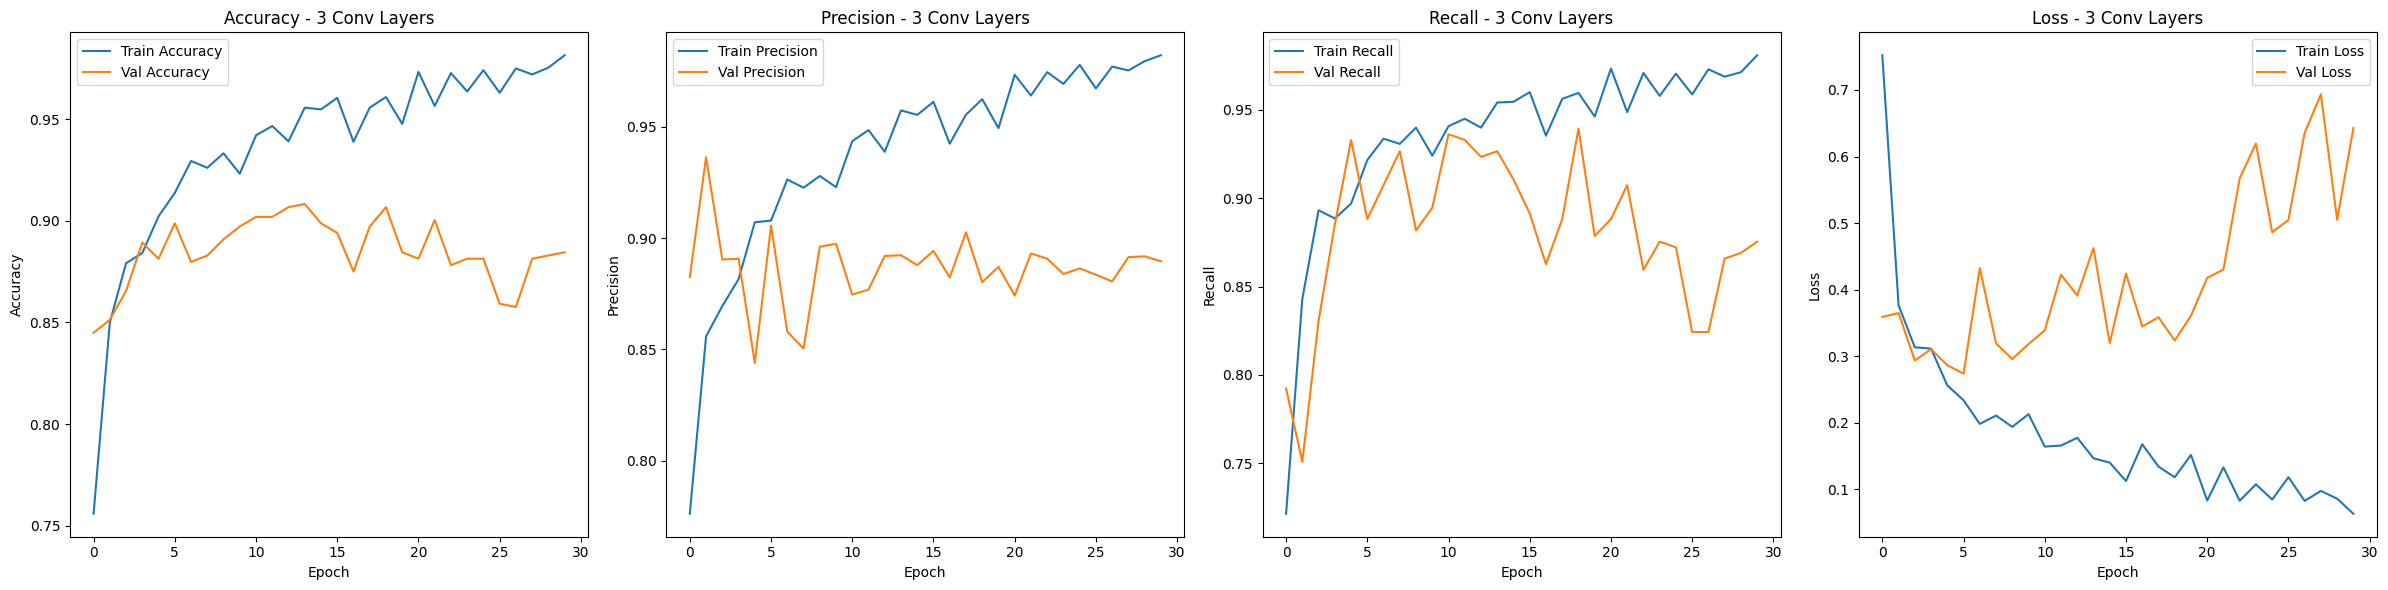


Training with 4 Convolutional Layers
Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 396s 5s/step - accuracy: 0.6475 - loss: 0.7168 - precision: 0.6522 - recall: 0.6537 - val_accuracy: 0.7484 - val_loss: 0.4866 - val_precision: 0.6734 - val_recall: 0.9553
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 391s 5s/step - accuracy: 0.8352 - loss: 0.4091 - precision: 0.8228 - recall: 0.8591 - val_accuracy: 0.8782 - val_loss: 0.3320 - val_precision: 0.8711 - val_recall: 0.8850
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 381s 5s/step - accuracy: 0.8502 - loss: 0.3646 - precision: 0.8366 - recall: 0.8721 - val_accuracy: 0.8782 - val_loss: 0.3090 - val_precision: 0.8806 - val_recall: 0.8722
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 381s 5s/step - accuracy: 0.8850 - loss: 0.3005 - precision: 0.8638 - recall: 0.9153 - val_accuracy: 0.8813 - val_loss: 0.3211 - val_precision: 0.9048 - val_recall: 0.8498
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 379s 5s/step - accuracy: 0.8881 - loss: 0.3242 - precision: 0.8796 - recall: 0.9002 - va

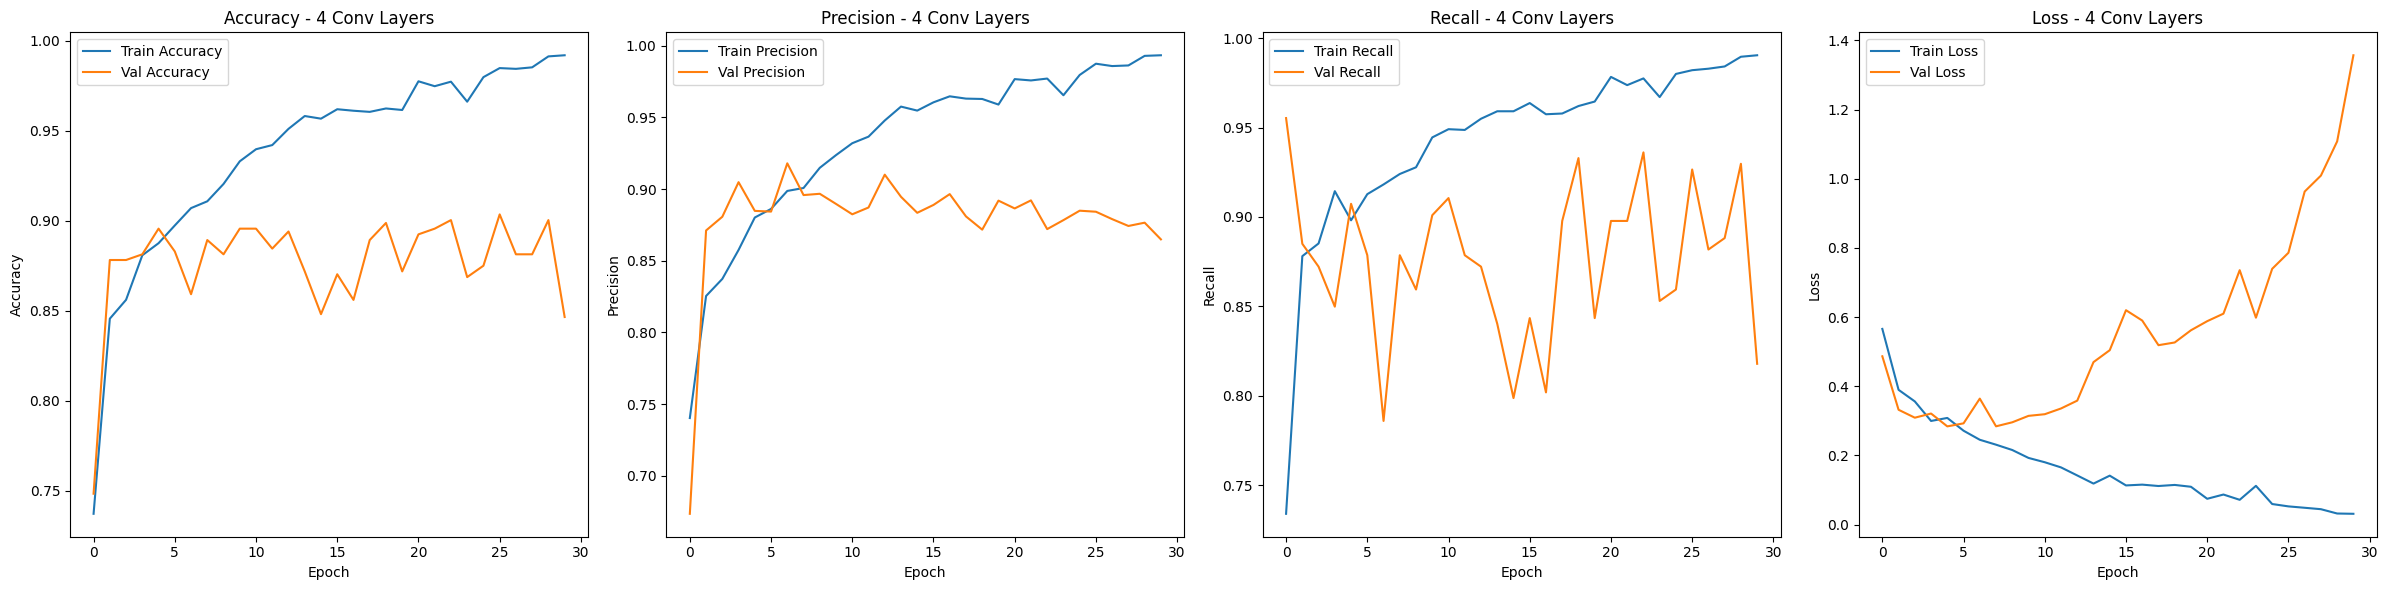


Training with 5 Convolutional Layers
Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 434s 6s/step - accuracy: 0.6485 - loss: 0.6293 - precision: 0.6590 - recall: 0.6661 - val_accuracy: 0.8449 - val_loss: 0.4323 - val_precision: 0.8248 - val_recall: 0.8722
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 408s 5s/step - accuracy: 0.8410 - loss: 0.4097 - precision: 0.8266 - recall: 0.8649 - val_accuracy: 0.8687 - val_loss: 0.3513 - val_precision: 0.8194 - val_recall: 0.9425
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 415s 6s/step - accuracy: 0.8694 - loss: 0.3458 - precision: 0.8438 - recall: 0.9082 - val_accuracy: 0.8718 - val_loss: 0.3161 - val_precision: 0.8295 - val_recall: 0.9329
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 414s 6s/step - accuracy: 0.8769 - loss: 0.3127 - precision: 0.8505 - recall: 0.9159 - val_accuracy: 0.8861 - val_loss: 0.3044 - val_precision: 0.8619 - val_recall: 0.9169
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 425s 6s/step - accuracy: 0.8961 - loss: 0.2717 - precision: 0.8686 - recall: 0.9344 - va

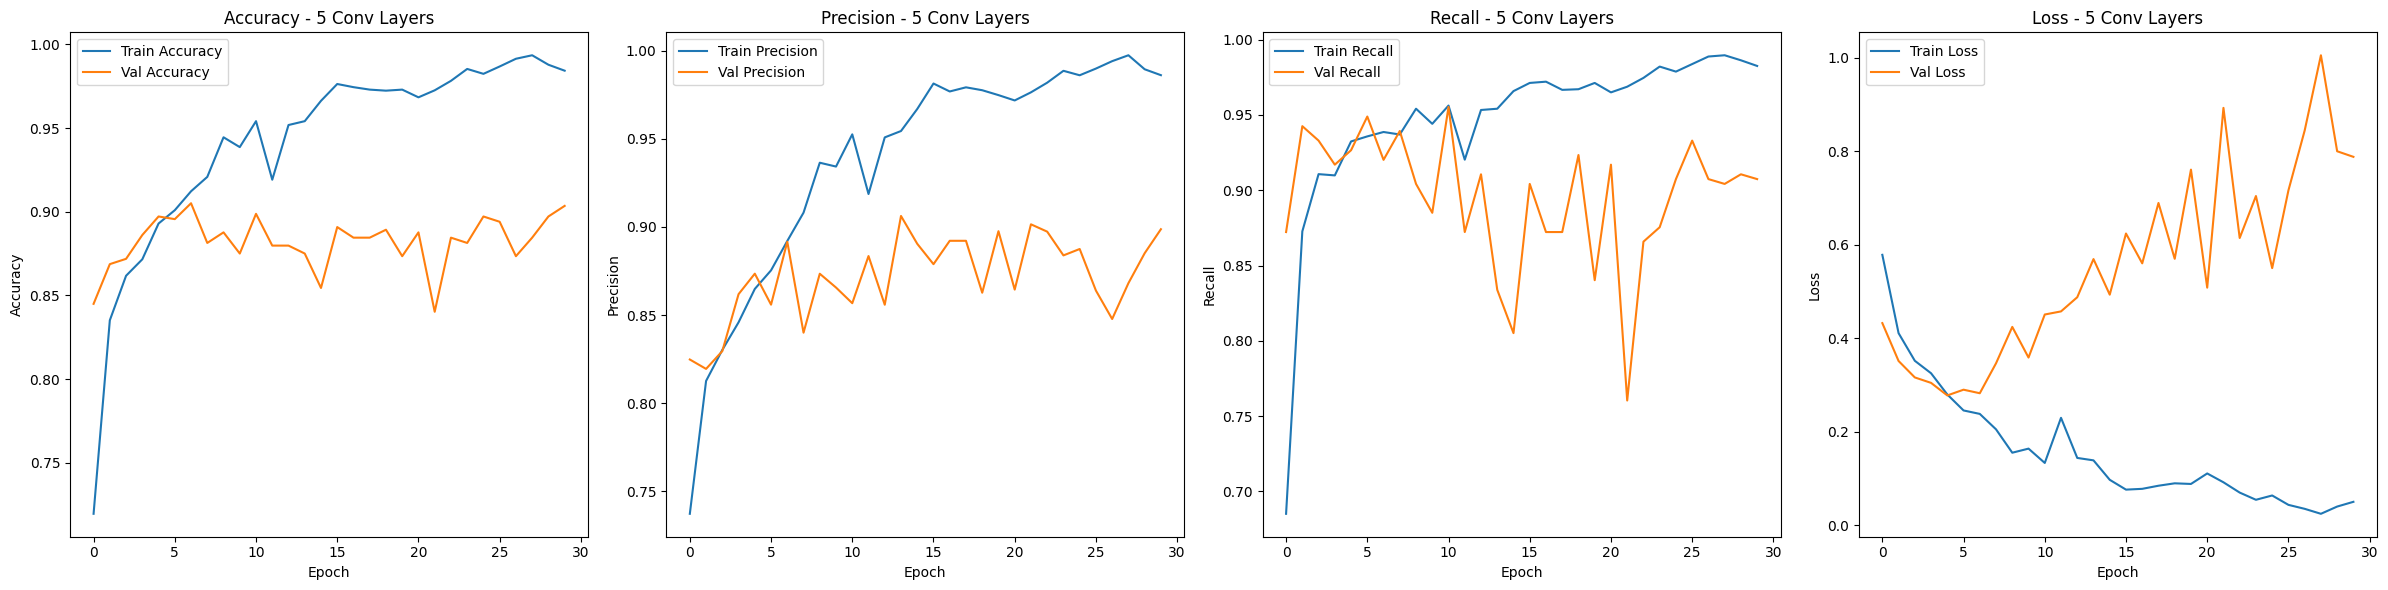

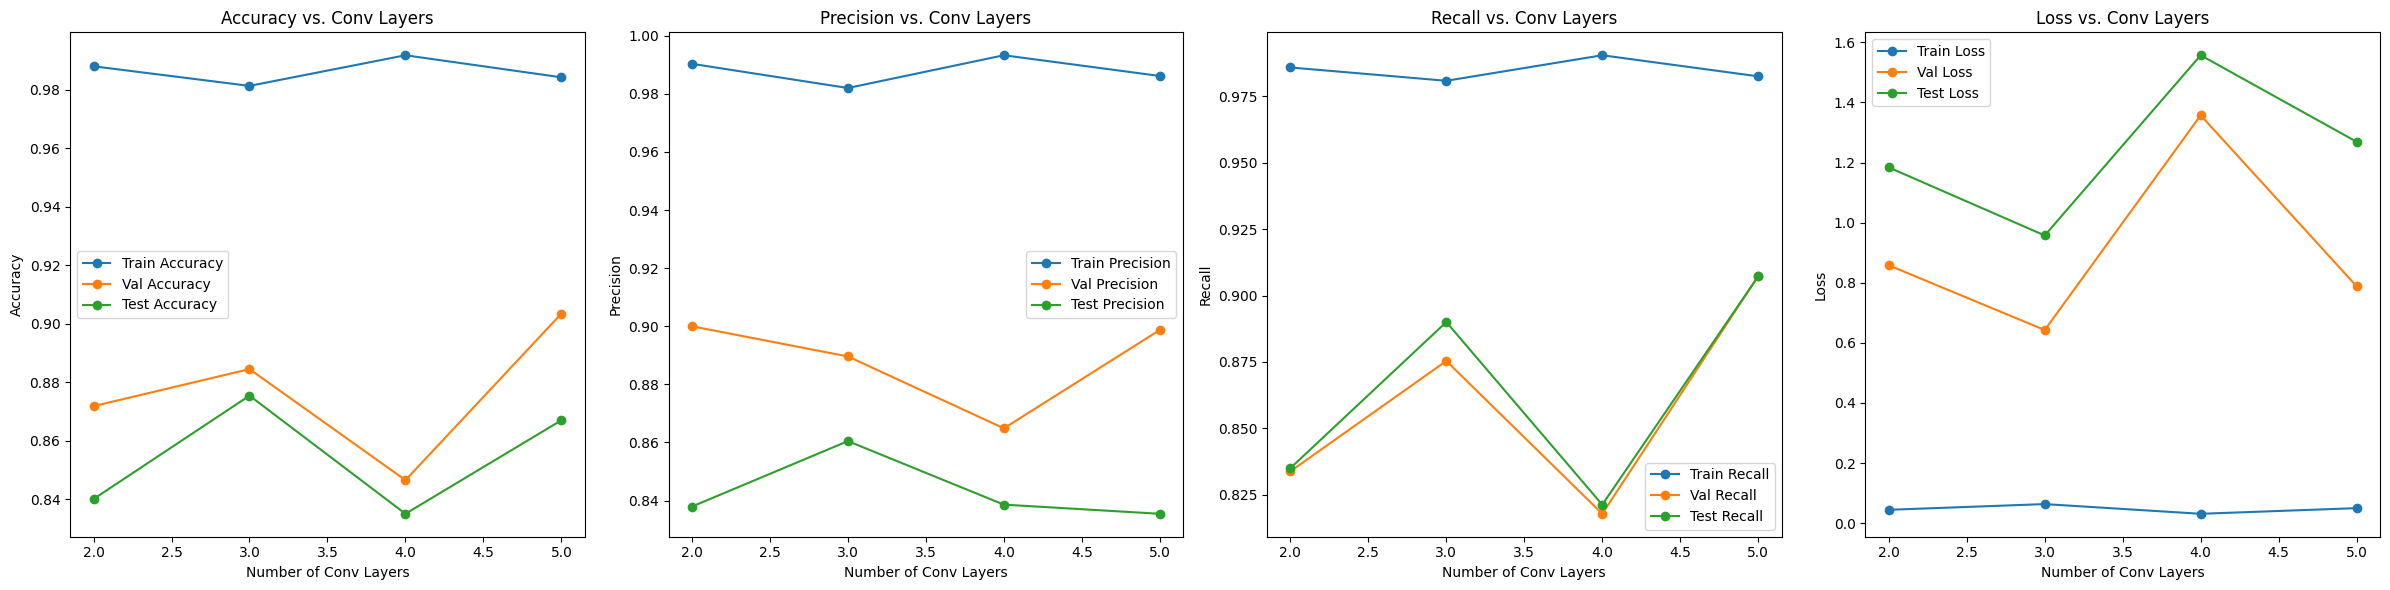

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, metrics
import matplotlib.pyplot as plt

# Parameters
conv_layer_counts = [2, 3, 4, 5]
epochs = 30
batch_size = 64
dense_layers = 2

# Metric containers
train_accuracies, val_accuracies, test_accuracies = [], [], []
train_precisions, val_precisions, test_precisions = [], [], []
train_recalls, val_recalls, test_recalls = [], [], []
train_losses, val_losses, test_losses = [], [], []

AUTOTUNE = tf.data.AUTOTUNE

# Load datasets once
train_ds = tf.keras.utils.image_dataset_from_directory(
    'processed_dataset/train',
    image_size=(512, 512),
    batch_size=batch_size,
    label_mode='binary'
).cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.keras.utils.image_dataset_from_directory(
    'processed_dataset/val',
    image_size=(512, 512),
    batch_size=batch_size,
    label_mode='binary'
).cache().prefetch(buffer_size=AUTOTUNE)

test_ds = tf.keras.utils.image_dataset_from_directory(
    'processed_dataset/test',
    image_size=(512, 512),
    batch_size=batch_size,
    label_mode='binary'
).cache().prefetch(buffer_size=AUTOTUNE)

# Function to build a CNN with variable conv layers
def build_model(n_conv_layers):
    model = models.Sequential()
    model.add(layers.Input(shape=(512, 512, 3)))
    model.add(layers.Rescaling(1./255))

    filters = [32, 64, 128, 256, 512]  # Define a max of 5 filter sizes

    for i in range(n_conv_layers):
        model.add(layers.Conv2D(filters[i], (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D(2, 2))

    model.add(layers.Flatten())

    for _ in range(dense_layers):
        model.add(layers.Dense(128, activation='relu'))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall')
        ]
    )
    return model

for n_conv in conv_layer_counts:
    print(f"\nTraining with {n_conv} Convolutional Layers")

    model = build_model(n_conv)

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs
    )

    test_loss, test_acc, test_precision, test_recall = model.evaluate(test_ds)

    # History data
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    precision = history.history['precision']
    val_precision = history.history['val_precision']
    recall = history.history['recall']
    val_recall = history.history['val_recall']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    train_accuracies.append(acc[-1])
    val_accuracies.append(val_acc[-1])
    test_accuracies.append(test_acc)

    train_precisions.append(precision[-1])
    val_precisions.append(val_precision[-1])
    test_precisions.append(test_precision)

    train_recalls.append(recall[-1])
    val_recalls.append(val_recall[-1])
    test_recalls.append(test_recall)

    train_losses.append(loss[-1])
    val_losses.append(val_loss[-1])
    test_losses.append(test_loss)

    # Plot epoch-wise metrics for each model
    epochs_range = range(epochs)
    plt.figure(figsize=(24, 6))

    plt.subplot(1, 4, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Val Accuracy')
    plt.title(f'Accuracy - {n_conv} Conv Layers')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 4, 2)
    plt.plot(epochs_range, precision, label='Train Precision')
    plt.plot(epochs_range, val_precision, label='Val Precision')
    plt.title(f'Precision - {n_conv} Conv Layers')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.legend()

    plt.subplot(1, 4, 3)
    plt.plot(epochs_range, recall, label='Train Recall')
    plt.plot(epochs_range, val_recall, label='Val Recall')
    plt.title(f'Recall - {n_conv} Conv Layers')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()

    plt.subplot(1, 4, 4)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.title(f'Loss - {n_conv} Conv Layers')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot final metrics across different convolution layer counts
plt.figure(figsize=(24, 6))

plt.subplot(1, 4, 1)
plt.plot(conv_layer_counts, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(conv_layer_counts, val_accuracies, label='Val Accuracy', marker='o')
plt.plot(conv_layer_counts, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Accuracy vs. Conv Layers')
plt.xlabel('Number of Conv Layers')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 4, 2)
plt.plot(conv_layer_counts, train_precisions, label='Train Precision', marker='o')
plt.plot(conv_layer_counts, val_precisions, label='Val Precision', marker='o')
plt.plot(conv_layer_counts, test_precisions, label='Test Precision', marker='o')
plt.title('Precision vs. Conv Layers')
plt.xlabel('Number of Conv Layers')
plt.ylabel('Precision')
plt.legend()

plt.subplot(1, 4, 3)
plt.plot(conv_layer_counts, train_recalls, label='Train Recall', marker='o')
plt.plot(conv_layer_counts, val_recalls, label='Val Recall', marker='o')
plt.plot(conv_layer_counts, test_recalls, label='Test Recall', marker='o')
plt.title('Recall vs. Conv Layers')
plt.xlabel('Number of Conv Layers')
plt.ylabel('Recall')
plt.legend()

plt.subplot(1, 4, 4)
plt.plot(conv_layer_counts, train_losses, label='Train Loss', marker='o')
plt.plot(conv_layer_counts, val_losses, label='Val Loss', marker='o')
plt.plot(conv_layer_counts, test_losses, label='Test Loss', marker='o')
plt.title('Loss vs. Conv Layers')
plt.xlabel('Number of Conv Layers')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()